<a href="https://colab.research.google.com/github/WilliamLele/WilliamLele/blob/main/Part_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 Regression

In this part, we are going to use linear regressors with the help of various basis functions. In this homework, you are meant to use the closed form of the optimal parameters with the Least Square Error loss function described in the class. You are not going to find the parameters iteratively.



**Dataset:** You are asked to work on the Boston House Prices dataset. This dataset consists of 506 data samples and 13 real attributes. The target value is the Median value of owner-occupied homes in $1000’s (’MEDV’ feature). You can use Sklearn, a python package, to easily download the dataset.

**Allowed package:** Pandas, Matplotlib, NumPy, and Sklearn (only for downloading the dataset).

**Deliverables:** Please have the code, figures, and discussions in a Jupyter Notebook file (.ipynb). Your file
should have 5 main sections, one for each task as follows:



# Part 1
**1.** First of all, we recommend checking whether the dataset includes missing parts. You can use Data Cleaning and Exploratory Data Analysis techniques to achieve a clean dataset. Then split the dataset into a train set (first 80% of the data) and a test set (last 20% of the data). Do NOT use the test set unless for final loss computation.

In [ ]:
#Import the package first
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
#Load the dataset
boston = load_boston()
#Create a pandas dataframe and use MEDV feature
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
#Check for missing values using isnull() method of the dataframe
print(df.isnull().sum())
df


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24

Split the data into train and test sets


In [ ]:
train_size = int(0.8 * len(df))
train_df, test_df = df[:train_size], df[train_size:]
print(f"Number of training examples: {len(train_df)}")
print(f"Number of test examples: {len(test_df)}")


Number of training examples: 404
Number of test examples: 102



# Part 2

**2.** Using the closed form of the linear regression for the Least Square Error, find the optimal weight parameters. Plot the target value and the predicted value based on the ’LSTAT’ and ’DIS’ attributes, and put the plots in your report.

In [ ]:
import numpy as np
# Extract the features and target values
X_train = train_df[['LSTAT', 'DIS']].values
y_train = train_df['MEDV'].values
# Add bias term to features
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

# Calculate optimal weight parameters
w_opt = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

print(f"Optimal weight parameters: {w_opt}")

Optimal weight parameters: [40.44999025 -1.09058333 -0.93208644]


Plot the predicted values against the target values

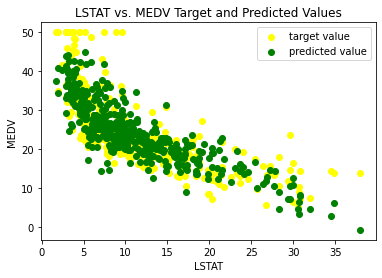

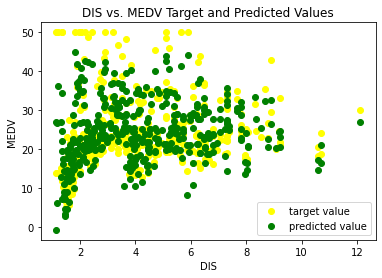

In [ ]:
import matplotlib.pyplot as plt
# extract the features and target values for training set
X_train = train_df.drop('MEDV', axis=1).values
y_train = train_df['MEDV'].values

# add bias term to features
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

# compute optimal weights using closed-form solution
w_opt = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# predict the target values using optimal weights
y_pred = X_train.dot(w_opt)

# create a scatter plot of the true target values and predicted values for LSTAT
plt.scatter(X_train[:, 13], y_train, color='yellow', label='target value')
plt.scatter(X_train[:, 13], y_pred, color='green', label='predicted value')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()
plt.title('LSTAT vs. MEDV Target and Predicted Values')
plt.show()

# create a scatter plot of the true target values and predicted values for DIS
plt.scatter(X_train[:, 8], y_train, color='yellow', label='target value')
plt.scatter(X_train[:, 8], y_pred, color='green', label='predicted value')
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.legend()
plt.title('DIS vs. MEDV Target and Predicted Values')
plt.show()

#Part 3
**3.** Now, let’s add the 2nd order of each feature to the original feature vectors. Therefore, we expand our feature domain and now have twice as many attributes as before. Again, find the optimal parameters in this manner and plot the target and predicted values based on the ’LSTAT’ and ’DIS’ attributes.

Optimal weight parameters: [ 1.38632642e+17 -2.33800181e+03  4.50070656e+03 -1.29724634e+17
 -1.16088196e+02  1.79798561e+03  1.37888691e+02 -4.88847703e+02
 -3.86780201e+01 -2.57975734e+01 -3.26889828e+02 -6.25673729e+01
 -1.45523615e+02  3.08873376e+02  6.96391598e+00 -9.58638582e+02
  1.29724634e+17  4.22676717e+01 -1.24438735e+03 -9.33447248e+01
  7.24213758e+02  3.35533479e+02 -1.65429451e+02 -2.81213751e+01
 -1.01822682e+02  3.94021935e+02]


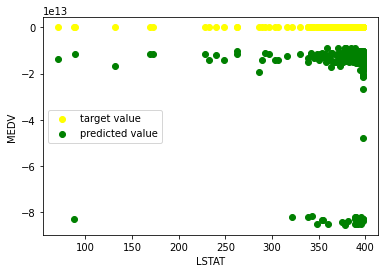

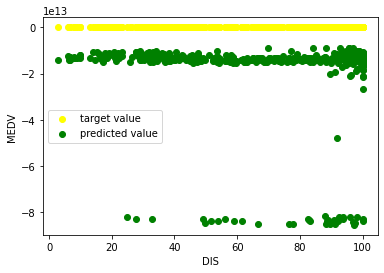

In [ ]:
# Extract the features and target values for training set
X_train = train_df.drop(columns=['MEDV']).values
y_train = train_df['MEDV'].values

# Add 2nd order of each feature to the original feature vectors
X_train = np.hstack((X_train, X_train**2))

# Add bias term to features
#X_train = np.c_[np.ones(X_train.shape[0]), X_train]
# normalize the data
X_nor = (X_train - X_train.min(axis=0)) / X_train.ptp(axis=0)
# Calculate optimal weight parameters
w_opt = np.linalg.inv(X_nor.T.dot(X_nor)).dot(X_nor.T.dot(y_train))

print(f"Optimal weight parameters: {w_opt}")

import matplotlib.pyplot as plt

# Predict the target values using optimal weights
y_pred = X_nor.dot(w_opt)

# Plot the target and predicted values for LSTAT
plt.scatter(X_train_sec[:, 12], y_train, color='yellow', label='target value')
plt.scatter(X_train_sec[:, 12], y_pred_sec, color='green', label='predicted value')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()
plt.show()

# Plot the target and predicted values for DIS
plt.scatter(X_train_sec[:, 7], y_train, color='yellow', label='target value')
plt.scatter(X_train_sec[:, 7], y_pred_sec, color='green', label='predicted value')
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.legend()
plt.show()

# Part 4
**4.** In this part, we want to use Gaussian basis functions along with the original features to expand the original feature domain. Generate 10 Gaussian basis functions with the spatial scale s = 1 and random values for μj. Again, find the optimal parameters with these new features added to the feature domain, and plot the target and predicted values, as before.

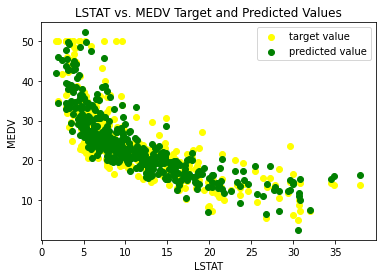

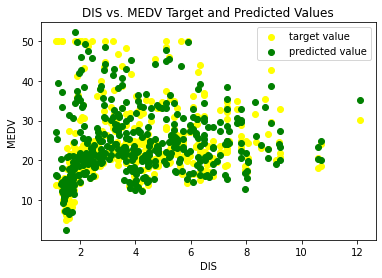

In [ ]:
# randomly choose 10 data points to use as means for the Gaussian basis functions
import random
from sklearn.linear_model import Ridge

# create 10 Gaussian basis functions
n1, n2 = X_train.shape
s = 1
rbfs = np.zeros((n1,10))
mu = np.random.randn(10, n2)
for i in range(n1):
  for j in range(10):
    rbfs[i,j] = np.exp(-np.linalg.norm(X_train[i,:]-mu[j,:])**2/(2*s**2))
# add Gaussian basis functions to the original feature vectors
X_rbf = np.hstack((np.ones(((X_train.shape[0]),1)), X_train, rbfs))

# compute optimal weights using Ridge regression
X_pinv = np.linalg.pinv(X_rbf)
w_opt = X_pinv.dot(y_train)

# predict the target values using optimal weights
y_pred = X_rbf.dot(w_opt)
# create a scatter plot of the true target values and predicted values for LSTAT
plt.scatter(X_rbf[:, 13], y_train, color='yellow', label='target value')
plt.scatter(X_rbf[:, 13], y_pred, color='green', label='predicted value')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()
plt.title('LSTAT vs. MEDV Target and Predicted Values')
plt.show()

# create a scatter plot of the true target values and predicted values for DIS
plt.scatter(X_rbf[:, 8], y_train, color='yellow', label='target value')
plt.scatter(X_rbf[:, 8], y_pred, color='green', label='predicted value')
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.legend()
plt.title('DIS vs. MEDV Target and Predicted Values')
plt.show()

In [ ]:
# calculate mean squared error
mse = ((y_pred - y_train) ** 2).mean()
print("MSE loss for Training set is: ", mse)

MSE loss for Training set is:  14.485636586720958


#Part 5
**5.** Report the train and test MSE loss and plots for each of the three above-mentioned feature domains. Overall, you have to report 6 loss values and 6 figures (sections 2, 3, 4, on train and test sets). Discuss the results in a paragraph. Which feature approach works better in this dataset?


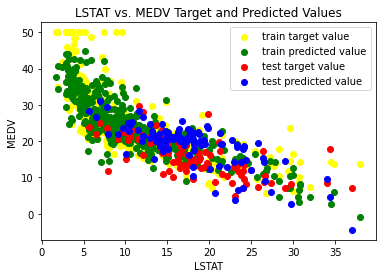

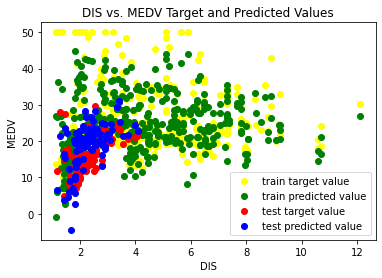

Train MSE Loss: 22.77837952180079
Test MSE Loss: 32.79986268020941


In [ ]:
#This is for section 2
# rename the columns
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
train_df.columns = feature_names
test_df.columns = feature_names

# separate the features and target values
X_train = train_df.drop('MEDV', axis=1).values
y_train = train_df['MEDV'].values
X_test = test_df.drop('MEDV', axis=1).values
y_test = test_df['MEDV'].values

# add bias term to features
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# compute optimal weights using closed-form solution
w_opt = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
# predict the target values using optimal weights for train and test sets
y_pred_train = X_train.dot(w_opt)
y_pred_test = X_test.dot(w_opt)
# create a scatter plot of the true target values and predicted values for LSTAT
plt.scatter(X_train[:, 13], y_train, color='yellow', label='train target value')
plt.scatter(X_train[:, 13], y_pred_train, color='green', label='train predicted value')
plt.scatter(X_test[:, 13], y_test, color='red', label='test target value')
plt.scatter(X_test[:, 13], y_pred_test, color='blue', label='test predicted value')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()
plt.title('LSTAT vs. MEDV Target and Predicted Values')
plt.show()
# create a scatter plot of the true target values and predicted values for DIS
plt.scatter(X_train[:, 8], y_train, color='yellow', label='train target value')
plt.scatter(X_train[:, 8], y_pred_train, color='green', label='train predicted value')
plt.scatter(X_test[:, 8], y_test, color='red', label='test target value')
plt.scatter(X_test[:, 8], y_pred_test, color='blue', label='test predicted value')
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.legend()
plt.title('DIS vs. MEDV Target and Predicted Values')
plt.show()

# calculate MSE for train and test sets
train_mse = ((y_pred_train - y_train)**2).mean()
test_mse = ((y_pred_test - y_test)**2).mean()

print('Train MSE Loss:', train_mse)
print('Test MSE Loss:', test_mse)

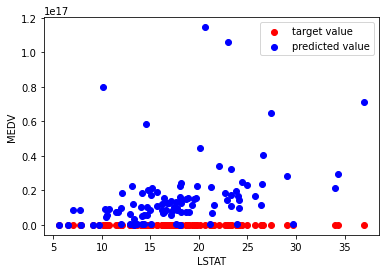

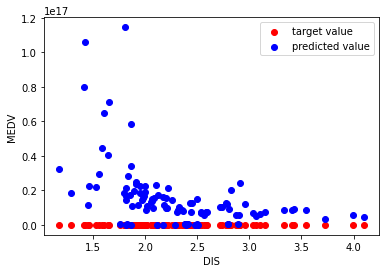

Train MSE loss: 1.0252306447648965e+32
Test MSE loss: 6.4003631069988215e+32


In [ ]:
#This is for section 3
# Extract the features and target values for training set
X_train = train_df.drop(columns=['MEDV']).values
y_train = train_df['MEDV'].values

# Add 2nd order of each feature to the original feature vectors
X_train_sec3 = np.hstack((X_train, X_train**2))

# Normalize the training data
X_train_normed = (X_train_sec3 - X_train_sec3.min(axis=0)) / X_train_sec3.ptp(axis=0)

# Calculate optimal weight parameters
w_opt = np.linalg.inv(X_train_normed.T.dot(X_train_normed)).dot(X_train_normed.T.dot(y_train))

# Predict the target values using optimal weights for the training set
y_pred_train = X_train_normed.dot(w_opt)

# Calculate the MSE loss for the training set
train_mse_loss = ((y_pred_train - y_train)**2).mean()

# Extract the features and target values for test set
X_test = test_df.drop(columns=['MEDV'])
y_test = test_df['MEDV']
y_test_np = y_test.to_numpy()

# Add 2nd order of each feature to the original feature vectors for the test set
X_test_sec3 = np.hstack((X_test.to_numpy(), X_test.to_numpy()**2))
X_train_sec3 = np.hstack((X_train, X_train**2))

# Normalize the test data
X_test_normed = (X_test_sec3 - X_train_sec3.min(axis=0)) / X_train_sec3.ptp(axis=0)

# Predict the target values using optimal weights for the test set
y_pred_test = X_test_normed.dot(w_opt)

# Calculate the MSE loss for the test set
test_mse_loss = ((y_pred_test - y_test_np)**2).mean()

# Plot the target and predicted values for LSTAT for the test set
plt.scatter(X_test_sec3[:, 12], y_test_np, color='yellow', label='target value')
plt.scatter(X_test_sec3[:, 12], y_pred_test, color='green', label='predicted value')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()
plt.show()

# Plot the target and predicted values for DIS for the test set
plt.scatter(X_test_sec3[:, 7], y_test_np, color='yellow', label='target value')
plt.scatter(X_test_sec3[:, 7], y_pred_test, color='green', label='predicted value')

plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.legend()
plt.show()

# Print the train and test MSE loss
print(f"Train MSE loss: {train_mse_loss}")
print(f"Test MSE loss: {test_mse_loss}")


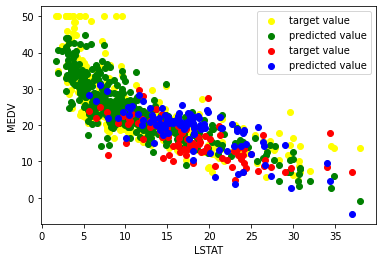

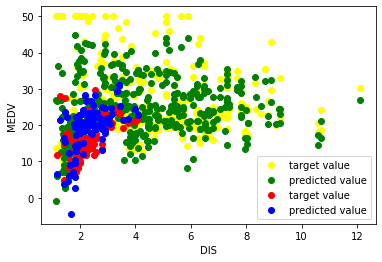

Train MSE loss is:  22.77837952180079
MSE loss for Test set is:  32.799862680204306


In [ ]:
#This is for section 4
# create 10 Gaussian basis functions
n1, n2 = X_train.shape
s = 1
rbfs = np.zeros((n1,10))
mu = np.random.randn(10, n2)
for i in range(n1):
  for j in range(10):
    rbfs[i,j] = np.exp(-np.linalg.norm(X_train[i,:]-mu[j,:])**2/(2*s**2))
# add Gaussian basis functions to the original feature vectors
X_rbf = np.hstack((np.ones(((X_train.shape[0]),1)), X_train, rbfs))
# compute optimal weights using Ridge regression
X_pinv = np.linalg.pinv(X_rbf)
w_opt = X_pinv.dot(y_train)

# predict the target values using optimal weights
y_pred = X_rbf.dot(w_opt)

# randomly choose 10 data points to use as means for the Gaussian basis functions in test set
X_test_np = X_test.to_numpy()
n_test = X_test_np.shape[0]
rbfs_test = np.zeros((n_test,10))
for i in range(n_test):
  for j in range(10):
    rbfs_test[i,j] = np.exp(-np.linalg.norm(X_test_np[i,:]-mu[j,:])**2/2)

X_rbf_test = np.hstack((np.ones(((n_test),1)), X_test_np, rbfs_test))
y_pred3_test = X_rbf_test.dot(w_opt)
#Plot the result with LSTAT
plt.scatter(X_rbf[:, 13], y_train, color='yellow', label='target value')
plt.scatter(X_rbf[:, 13], y_pred, color='green', label='predicted value')

plt.scatter(X_rbf_test[:, 13], y_test_np, color='red', label='target value')
plt.scatter(X_rbf_test[:, 13], y_pred3_test, color='blue', label='predicted value')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()
plt.show()

#Plot the result with DIS
plt.scatter(X_rbf[:, 8], y_train, color='yellow', label='target value')
plt.scatter(X_rbf[:, 8], y_pred, color='green', label='predicted value')

plt.scatter(X_rbf_test[:, 8], y_test_np, color='red', label='target value')
plt.scatter(X_rbf_test[:, 8], y_pred3_test, color='blue', label='predicted value')
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.legend()
plt.show()
# calculate the train MSE loss for this model
print("Train MSE loss is: ", ((y_pred-y_train)**2).mean())
#Calculate the test MSE loss for this model
print("MSE loss for Test set is: ", ((y_pred3_test-y_test_np)**2).mean())

In conclusion, for this dataset, using the feature approach in section 4 (Gaussian basis functions) results in the best model.